In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Initial Data Load

In [2]:
data = pd.read_csv('fake_job_postings.csv')

In [3]:
data.shape

(17880, 18)

In [4]:
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Data Exploration

In [5]:
data.isna().any()

job_id                 False
title                  False
location                True
department              True
salary_range            True
company_profile         True
description             True
requirements            True
benefits                True
telecommuting          False
has_company_logo       False
has_questions          False
employment_type         True
required_experience     True
required_education      True
industry                True
function                True
fraudulent             False
dtype: bool

0.04843400447427293
866


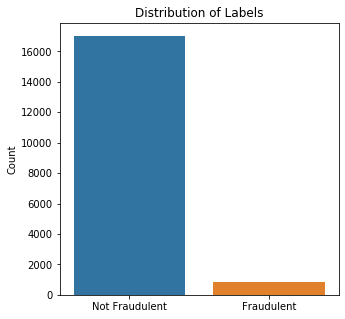

In [6]:
data['fraudulent'].value_counts()

f, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=['Not Fraudulent', 'Fraudulent'], y=data['fraudulent'].value_counts(), ax=ax)

ax.set_title('Distribution of Labels')
ax.set_ylabel('Count');

print(np.mean(data['fraudulent']))
print(sum(data['fraudulent']))

In [7]:
for column in data.columns:
    print('{}:'.format(column), round(sum(data[column].isna()) / data.shape[0],2))

job_id: 0.0
title: 0.0
location: 0.02
department: 0.65
salary_range: 0.84
company_profile: 0.19
description: 0.0
requirements: 0.15
benefits: 0.4
telecommuting: 0.0
has_company_logo: 0.0
has_questions: 0.0
employment_type: 0.19
required_experience: 0.39
required_education: 0.45
industry: 0.27
function: 0.36
fraudulent: 0.0


In [8]:
data['employment_type'].fillna('None', inplace = True)

In [9]:
#Breadth of categorical variables:
print('# of unique titles: ', len(set(data['title'])))
print('# of unique locations: ', len(set(data['location'])))
print('# of unique departments: ', len(set(data['department'])))
print('# of unique salary ranges: ', len(set(data['salary_range'])))
print('# of unique employment type: ', len(set(data['employment_type'])))
print('# of unique required experiences: ', len(set(data['required_experience'])))
print('# of unique required education: ', len(set(data['required_education'])))
print('# of unique industries: ', len(set(data['industry'])))
print('# of unique functions: ', len(set(data['function'])))

# of unique titles:  11231
# of unique locations:  3106
# of unique departments:  1338
# of unique salary ranges:  875
# of unique employment type:  6
# of unique required experiences:  8
# of unique required education:  14
# of unique industries:  132
# of unique functions:  38


### Employment Type EDA:

In [10]:
employment_group = data.groupby('employment_type').count()['job_id']
employment_group = employment_group / sum(employment_group)

In [11]:
fraudelent_set = data[data['fraudulent'] == 1].copy()
fraudulent_group = fraudelent_set.groupby('employment_type').count()['job_id']
fraudulent_group = fraudulent_group / sum(fraudulent_group)

In [12]:
combined_employ_group = pd.concat([pd.DataFrame(employment_group), pd.DataFrame(fraudulent_group)], axis = 0)
combined_employ_group['fraud'] = [0,0,0,0,0,0,1,1,1,1,1,1]
combined_employ_group['employment_type'] = combined_employ_group.index

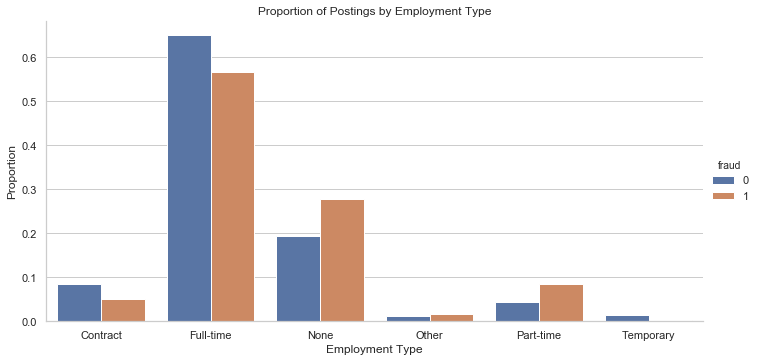

In [13]:
sns.set(style="whitegrid")
sns.catplot(x='employment_type', y='job_id', hue='fraud', data=combined_employ_group, kind='bar', height=5, aspect=2)

plt.title('Proportion of Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion');

#Fraud slightly overpresented in the None and Part-time job categories

In [14]:
data.groupby('employment_type').mean()['fraudulent']

employment_type
Contract     0.028871
Full-time    0.042169
None         0.069432
Other        0.066079
Part-time    0.092848
Temporary    0.008299
Name: fraudulent, dtype: float64

### Analysis of Salary Ranges:

In [15]:
print(len(set(data['salary_range'])))
data['has_salary'] = ~data['salary_range'].isnull()

875


In [16]:
salary_group = data.groupby('has_salary').mean()['fraudulent']
salary_group

has_salary
False    0.042832
True     0.077755
Name: fraudulent, dtype: float64

Text(0.5, 0, 'Includes Salary Detail')

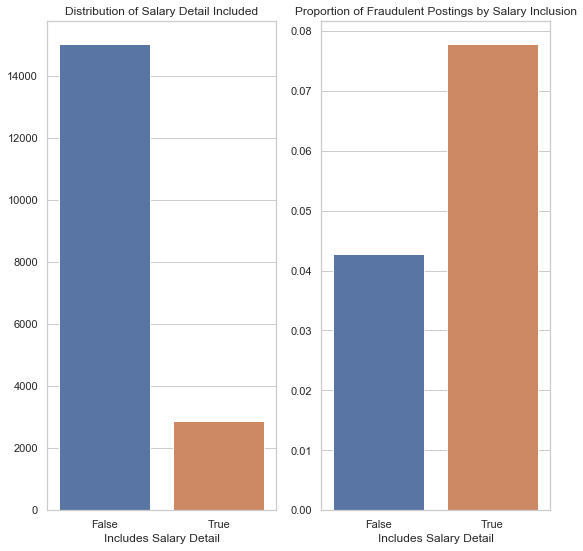

In [19]:
f, ax = plt.subplots(1, 2, figsize=(9,9))
sns.barplot(x=data.has_salary.value_counts().index, y = data.has_salary.value_counts().values, ax=ax[0])
sns.barplot(x=salary_group.index, y=salary_group.values, ax=ax[1])

ax[0].set_title('Distribution of Salary Detail Included')
ax[1].set_title('Proportion of Fraudulent Postings by Salary Inclusion')
ax[0].set_xlabel('Includes Salary Detail')
ax[1].set_xlabel('Includes Salary Detail')
#Fraudulent jobs overrepresented in job postings with salaries:

# Analysis of Description:

In [20]:
from collections import Counter
from gensim.parsing import preprocessing
import nltk
import string
import html
from lexical_diversity import lex_div as ld

In [21]:
corpus = data['description'].copy()
corpus.fillna('', inplace = True)

In [22]:
corpus.isnull().any()

False

### Pipeline

    1. Count Punctuation
    2. Count Numbers
    3. Count links
    4. Lexical Diversity

### Count Punctuation & Numbers

In [23]:
def count_punctuation(text):
    
    count = 0
    
    c = Counter(text)
    for item in string.punctuation:
        try:
            count+=c[item]
        except:
            pass
    
    return count

def count_number(text):
    
    count = 0
    
    c = Counter(text)
    for item in np.arange(0, 10).astype(str):
        try:
            count+=c[item]
        except:
            pass
    
    return count
    

In [24]:
def find_url(text):
    
    #Observed pattern of urls:
    url_pattern = re.compile(r'#URL.*?#')
    
    #See if this matches just the text URL or url:
    url = re.compile(r'url|URL')
    
    return re.findall(url_pattern, text)
    
    

In [25]:
urls = corpus.apply(lambda x: find_url(x))

In [26]:
url_count = []

for item in urls:
    url_count.append(len(item))


In [27]:
data['num_links'] = url_count
data['num_nums'] = corpus.apply(lambda x: count_number(str(x)))
data['num_punct'] = corpus.apply(lambda x: count_punctuation(str(x)))
data['description_length'] = corpus.apply(lambda x: len(str(x)))

# Baseline Models without NLP

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, SCORERS

In [29]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'has_salary', 'num_links', 'num_nums', 'num_punct',
       'description_length'],
      dtype='object')

### One-hot encode

In [30]:
set(data.employment_type)

{'Contract', 'Full-time', 'None', 'Other', 'Part-time', 'Temporary'}

In [31]:
mlb = MultiLabelBinarizer()
mlb.fit([data.employment_type])
mlb.classes_

employment_df = pd.DataFrame(mlb.transform([[item] for item in data.employment_type]))
employment_df.columns = mlb.classes_

employment_df

,Contract,Full-time,None,Other,Part-time,Temporary
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
17875,0,1,0,0,0,0
17876,0,1,0,0,0,0
17877,0,1,0,0,0,0
17878,1,0,0,0,0,0


In [32]:
#Create features:
X = data[['telecommuting', 'has_company_logo', 'has_questions', 'has_salary',
             'num_nums', 'num_links', 'num_punct', 'description_length']].copy()

X = pd.concat([X, employment_df], axis = 1)
y = data['fraudulent'].copy()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1000, stratify = y)

In [34]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [35]:
logparams = {
    'max_iter': [5000],
    'solver': ['liblinear'],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}]
}

rfparams = {
    'n_estimators': [100],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}]
}

xgbparams = {
    'eta': [.01, .05, .1, .15, .2],
    'scale_pos_weight': [.05, .1, .15, .2]
}

In [36]:
logGrid = GridSearchCV(LogisticRegression(), param_grid=logparams, scoring='roc_auc')
rfGrid = GridSearchCV(RandomForestClassifier(), param_grid=rfparams, scoring='roc_auc')
xgbGrid = GridSearchCV(XGBClassifier(), param_grid=xgbparams, scoring='roc_auc')

models = [logGrid, rfGrid, xgbGrid]

In [37]:
precisions = []
recalls = []
cms = []
aucs = []
predictions = []

for model in models:
    model.fit(X_train, y_train)
    
    model_predict = model.predict(X_test)
    
    predictions.append(model_predict)
    precisions.append(precision_score(y_test, model_predict))
    recalls.append(recall_score(y_test, model_predict))
    aucs.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    
    cms.append(confusion_matrix(y_test, model.predict(X_test)))
    
    

Precision: [0.15567 0.83553 1.     ]


Recall: [0.70769 0.48846 0.22692]


AUC: [0.79953 0.90288 0.91208]




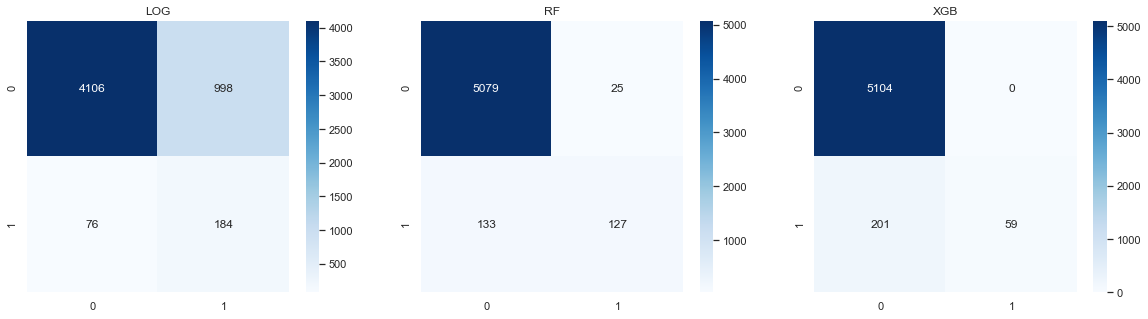

In [38]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))

for i in range(0, len(cms)):
    sns.heatmap(cms[i], annot=True, fmt = 'd', cmap='Blues', ax=ax[i])

ax[0].set_title('LOG')
ax[1].set_title('RF')
ax[2].set_title('XGB');

print('Precision:', np.round(np.array(precisions),5))
print('\n')

print('Recall:', np.round(np.array(recalls),5))
print('\n')

print('AUC:', np.round(np.array(aucs),5))
print('\n')


In [39]:
models[0].best_estimator_

LogisticRegression(C=1.0, class_weight={0: 1, 1: 20}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
models[1].best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
models[1].best_estimator_.feature_importances_

array([0.01312848, 0.07755404, 0.02365271, 0.01977716, 0.17662369,
       0.02835838, 0.23303065, 0.37694657, 0.00719851, 0.01449877,
       0.01128364, 0.00407118, 0.01243386, 0.00144236])

In [49]:
pd.Series(models[1].best_estimator_.feature_importances_, index=X.columns).sort_values()

Temporary             0.001442
Other                 0.004071
Contract              0.007199
None                  0.011284
Part-time             0.012434
telecommuting         0.013128
Full-time             0.014499
has_salary            0.019777
has_questions         0.023653
num_links             0.028358
has_company_logo      0.077554
num_nums              0.176624
num_punct             0.233031
description_length    0.376947
dtype: float64

In [50]:
models[2].best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.150000006, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.2, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

### Fraud by Description Length:

In [85]:
description_cuts = pd.qcut(data['description_length'], 4)
set(description_cuts)

{Interval(-0.001, 607.0, closed='right'),
 Interval(607.0, 1017.0, closed='right'),
 Interval(1017.0, 1586.0, closed='right'),
 Interval(1586.0, 14907.0, closed='right')}

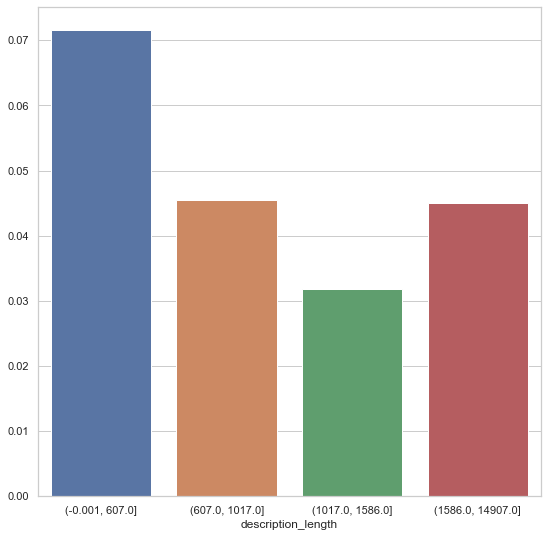

In [88]:
f, ax = plt.subplots(figsize = [9,9])

ax = sns.barplot(x=description_group.index, y=description_group.values);

# Prepare Description for Modeling

In [256]:
from gensim import downloader
from gensim.models.fasttext import load_facebook_model
from gensim.test.utils import datapath

In [257]:
def preprocess_string(text):
    
    text = text.lower()
    text = html.unescape(text)
    text = preprocessing.strip_non_alphanum(text)
    text = preprocessing.strip_numeric(text)
    text = preprocessing.strip_multiple_whitespaces(text)
    text = preprocessing.remove_stopwords(text)
    text = preprocessing.strip_short(text, minsize=3)
    
    return text
      

In [258]:
cleaned_corpus = corpus.apply(lambda x: preprocess_string(x))

In [21]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [22]:
from langdetect import detect

In [221]:
description_language = cleaned_corpus.apply(lambda x: detect(x) if len(x) > 0 else 'None')

In [260]:
data['language'] = description_language
data['cleaned_description'] = cleaned_corpus

In [272]:
to_translate = data[(data['language'] != 'en') & (data['language'] != 'None')]['cleaned_description']
no_translate = data[(data['language'] == 'en') | (data['language'] == 'None')]['cleaned_description']

# Translation:

In [20]:
from googletrans import Translator

In [263]:
trans = Translator()
trans.translate('hola').text

'Hi there'

In [264]:
translations = pd.Series(dtype=object)

for index, item in to_translate.items():
    try:
        translations.loc[index] = trans.translate(item).text
    except:
        print(index)
        print('error')
        break

In [275]:
translated_descriptions = pd.concat([translations, no_translate], axis = 0)
translated_descriptions.sort_index(inplace = True)
translated_descriptions

0        food fast growing james beard award winning on...
1        organised focused vibrant awesome passion cust...
2        client located houston actively seeking experi...
3        company esri environmental systems research in...
4        job title itemization review managerlocation f...
                               ...                        
17875    case time visited website vend award winning w...
17876    payroll accountant focus primarily payroll fun...
17877    experienced project cost control staff enginee...
17878    nemsia studios looking experienced visual grap...
17879    vend award winning web based point sale softwa...
Length: 17880, dtype: object

In [276]:
data['final_descriptions'] = translated_descriptions

In [288]:
data[['final_descriptions', 'description']]

,final_descriptions,description
0,food fast growing james beard award winning on...,"Food52, a fast-growing, James Beard Award-winn..."
1,organised focused vibrant awesome passion cust...,Organised - Focused - Vibrant - Awesome!Do you...
2,client located houston actively seeking experi...,"Our client, located in Houston, is actively se..."
3,company esri environmental systems research in...,THE COMPANY: ESRI – Environmental Systems Rese...
4,job title itemization review managerlocation f...,JOB TITLE: Itemization Review ManagerLOCATION:...
...,...,...
17875,case time visited website vend award winning w...,Just in case this is the first time you’ve vis...
17876,payroll accountant focus primarily payroll fun...,The Payroll Accountant will focus primarily on...
17877,experienced project cost control staff enginee...,Experienced Project Cost Control Staff Enginee...
17878,nemsia studios looking experienced visual grap...,Nemsia Studios is looking for an experienced v...


In [289]:
data.to_csv('language_processed_df.csv')

In [2]:
data = pd.read_csv('language_processed_df.csv', index_col = 0)
data.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,fraudulent,has_salary,num_links,num_nums,num_punct,description_length,description_diversity,language,cleaned_description,final_descriptions
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,False,0,6,24,905,0.886076,en,food fast growing james beard award winning on...,food fast growing james beard award winning on...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,False,1,65,55,2077,0.750000,en,organised focused vibrant awesome passion cust...,organised focused vibrant awesome passion cust...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,False,0,0,7,355,0.928571,en,client located houston actively seeking experi...,client located houston actively seeking experi...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,False,0,3,35,2600,0.777778,en,company esri environmental systems research in...,company esri environmental systems research in...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,False,0,0,35,1520,0.784000,en,job title itemization review managerlocation f...,job title itemization review managerlocation f...


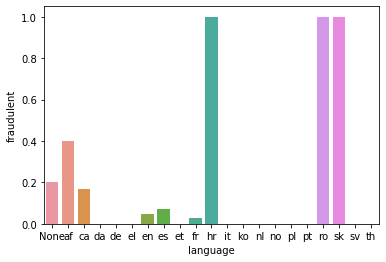

In [14]:
sns.barplot(x = data.groupby('language').mean()['fraudulent'].index, y = data.groupby('language').mean()['fraudulent'])

In [28]:
data[data['language'] == 'ko']

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,fraudulent,has_salary,num_links,num_nums,num_punct,description_length,description_diversity,language,cleaned_description,final_descriptions
2383,2384,Developer,"KR, , Seoul",Developer,NaN,Our mission is to optimize the first screen of...,버즈빌에서 글로벌 모바일 서비스에 대해 무한한 관심과 열정이 있는 개발자를 찾습니다...,코딩하는 것이 즐거우신 분자료구조/알고리즘/OS/네트워크에 관한 기초지식을 보유하신...,NaN,0,...,0,False,0,12,25,893,0.778571,ko,버즈빌에서 글로벌 모바일 서비스에 무한한 관심과 열정이 개발자를 찾습니다 잠금화면을...,Take advantage of unlimited interest and passi...
11630,11631,Finance/Office Manager,"KR, , Seoul",Finance,NaN,Our mission is to optimize the first screen of...,버즈빌에서 글로벌 역량을 지니고 있는 재무 및 오피스 매니저를 찾습니다. 잠금화면을...,회계 및 재무업무에 대한 실무 경험 보유 (2년 이상 우대)무의 상태에서 재무 관리...,NaN,0,...,0,False,0,5,38,853,0.857143,ko,버즈빌에서 글로벌 역량을 지니고 오피스 매니저를 찾습니다 잠금화면을 플랫폼으로 활용...,In Birdsville has a global capability to take ...
13695,13696,UX/UI Designer,"KR, , Seoul",Design,NaN,Our mission is to optimize the first screen of...,버즈빌에서 글로벌 모바일 서비스에 무한한 관심과 열정이 있는 UX/UI 디자이너를 ...,UI/UX 디자인 Lead로서웹/모바일 UI디자인 스킬 보유(실무레벨) 및 실무 경...,NaN,0,...,0,False,0,12,29,967,0.760274,ko,버즈빌에서 글로벌 모바일 서비스에 무한한 관심과 열정이 디자이너를 찾습니다 잠금화면...,Take advantage of unlimited interest and passi...


In [27]:
detect('best job in the world')

'en'

# Spacy

In [30]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import en_core_web_lg
from spacy.lemmatizer import Lemmatizer
from spacy.util import minibatch, compounding

In [31]:
nlp = en_core_web_lg.load()

In [32]:
docs = list(nlp.pipe(data['final_descriptions'], disable=['parser', 'ner']))

TypeError: Argument 'string' has incorrect type (expected str, got float)

In [ ]:
lemma_words = pd.Series(dtype=object)

for i, item in enumerate(docs):
    lemma_words.loc[i] = ' '.join([word.lemma_ for word in item])

### Distribution of Words:

In [282]:
from collections import Counter

In [283]:
lemma_tokens = lemma_words.apply(lambda x: nltk.word_tokenize(x))

In [284]:
fraud_index = data['fraudulent'] == 1

In [285]:
fraud_words = []

for item in lemma_tokens[fraud_index]:
    fraud_words.extend(item)
    
clean_words = []

for item in lemma_tokens[~fraud_index]:
    clean_words.extend(item)

In [286]:
c_fraud = Counter(fraud_words)
for item, value in zip(list(c_fraud), c_fraud.values()):
    if value == 1:
        print(item)

southeast
hazelcrest
occupiedjob
appt
url_cbdacecfbcbbcfbebdecaba
skynet
firmbase
columbus
professionalwho
hunt
solutionsand
positiondeale
levelto
serviceswill
pursue
andnetworkingmeet
salesactivity
goalsmaintain
ofclient
informationmanage
salespipelinerequirements
preferredminimum
salesexperiencedemonstrated
qualifyingand
overcome
objectionsfamiliarity
industryexceptional
presentationcommunication
skillscustomer
supportto
baseprofessional
conductability
businessdecision
makersability
salesmethodologyunderstanding
productsexperience
crmhigh
starterskynet
toprovide
wecover
thecountry
internetsolutions
toeradicate
hassle
themfocus
dominate
url_bdeabedbadaffabeddbfcfbbea
furtherdevelopment
floridahealthcare
inthe
fhc
positionreponsibilitie
programsupport
activities
committeesdocument
cycleimplement
fhcpmodels
caredevelop
auditprogramdevelop
improvementprogramoperate
trackingprogramoversee
andinterventionsoperate
trainingand
programsupervise
coordinatorother
ofperformance
positionspecifica

broker
naval
diving
rov
hazid
constructability
efforts
erforms
padeye
stanchion
communicative
url_abecbbbaadffccccaaeb
healing
marketpursue
caring
takoma
minutes
cardiac
vascular
thoracic
assume
objc
url_cbcbaafdebbcdcfadeaabdcb
convert
durable
ribbon
ink
jet
substrate
examqualification
weekrelationship
cooperate
maverick
currency
clerksthe
alphabetical
attributesproven
dependability
reliabilityexperience
preferredquickbooks
plusinterest
preferredknowledge
pluswill
entrieswill
rebatesgenerate
programmerrole
dutiesgreet
situationsopen
materialsproofreads
accuracyattends
dailyis
taskperform
caxton
westminster
swh
qwunited
ermins
immediatelyfor
hotelmanagement
numberof
gbppreferred
minimumavailable
demi
departies
storekeeper
continental
banquetsales
salescoordinator
captain
hostess
bfloor
washer
relationsassistant
warder
foreign
masseur
massgist
marketingassistant
cafemanager
indication
inconvenience
furnishing
assumption
gbpcan
lieu
amountwill
trafford
applystarter
addressfor
email_becad

In [287]:
c_fraud.most_common(20)

[('work', 1242),
 ('service', 772),
 ('customer', 700),
 ('project', 638),
 ('position', 613),
 ('product', 607),
 ('team', 604),
 ('company', 557),
 ('time', 531),
 ('experience', 530),
 ('provide', 509),
 ('business', 480),
 ('include', 475),
 ('management', 466),
 ('job', 462),
 ('look', 450),
 ('skill', 447),
 ('support', 444),
 ('process', 398),
 ('require', 396)]

In [215]:
c_clean = Counter(clean_words)
for item, value in zip(list(c_clean), c_clean.values()):
    if value == 1:
        print(item)

jetski
opperating
glodal
reviewreports
operationsresponsible
callsimplements
expectationsresponsible
expensesadditional
complianceoccasional
editorsset
toresearch
ecosystemensure
url_adbddeccedeefeceeaa
positionwante
solverairenvy
responsibilitiesservice
irate
delightedable
memberspassion
ariseexcellent
checkfocused
email_dfbffcfbedeaaedaccfeee
environmentsdocument
documentationfollow
automationmigrate
environmentsdeploy
userstest
basesupport
crusade
descriptionvault
jordan
pancake
responsibilitiesunleash
bunny
milestonesdevelop
yourselfgenerate
upsellimplimente
salesconceive
implimente
midsize
workersopportunity
strategiescontract
fiercely
systemstranslate
codeexploring
innovationcreate
technologieshandle
decisionscollaborating
intrested
email_dcfbdcaccdcdadddaac
uaerequirementsendocrinologistgastroenterologistcardiologistneurologisturologistgynecologist
pediatricianorthopedic
surgeoninternal
medicinegeneral
surgeonneonatologistcandidate
licenseinterested
waltham
deliverablesmodifye
n

oversightdirect
developmentleadership
missions
membershipoversee
ecmt
institutionsdevelop
liquids
minicab
wantwe
enquiriesassistance
setupadvise
issuescommunication
modifiy
llbe
enginecreate
renderingresearch
academiaexplore
myohave
downlayer
banding
bander
upsassign
sheetsrecord
formsdevelop
succint
deskinternational
planningteam
eventsoffice
budgetinguniversity
managerassign
trainingrecord
formsperform
engagementengage
requirementsdefine
allocatable
deliveryresponsible
supportschedule
calendarsnew
leavearrange
xmas
partymanaging
managementoccasional
collateralsmaintaining
includ
grassroot
managementsocial
managementmedia
facebookmedia
dspsmedia
homesocial
researchambassador
recruitmentassisting
dutiesinterfacing
responsibilitiesleading
launchdevelope
leadsliaise
resolutioninterface
deliveryunderstande
ecosystemhighly
mpart
highscale
typographical
inadvertently
applicantsattend
bluecard
employeescoordinate
meetingstrack
spiritbe
sorrowshelp
clubcomponent
studentsassist
clubmaintain
fo

skillsone
experiencean
essentialwho
nonprescription
trainable
alertspermanent
storagead
integrationshare
emailingthing
bingcontinue
sitesanalyse
plansutilise
changesdevelop
summariesresponsible
accuratecoordinate
platformscraft
lifekeepe
citydevising
globallydevelope
brandpromoting
businessbuilding
marketsadvising
handlingplanning
objectivesmanaging
fpay
hourposition
dowagiac
aaron
hurst
caseswork
jenkinsaid
usg
responsibilitiesdeale
postsresolve
necessaryunderstande
modellearne
editionsbecoming
orion
payrate
friapply
url_faffbcaeedffefebee
omnina
requirementsinstallation
email_cccacbefcfdaddacbadecfbdbcdabecdc
radiojar
relater
prospectsteam
dealsperform
bearer
url_bbeeefcfeccfbbcfcceaedfdcbfabadcd
hotshot
email_fdafcbbecadfadd
straightaway
arms
bima
lions
eurobest
lovie
webbys
url_aecdcabcaadceceadddfdc
gentleman
preferrable
criteriaensuring
scholarships
awardsverify
requiredapprove
acceptanceprocess
isir
judgmentsset
resourcesrecognize
gamespartner
efficiencyevaluate
colin
facebookru

regularlyenforcing
descriptionwhat
url_eecbdffbaffeaebedfafeeda
andreliably
withtrust
valueshere
challengesrole
skillsdeep
qualificationsbsc
locationgkazi
plateia
kerameikou
rewardswe
cvsapplicant
lpsassist
themthe
ctfl
postsidentify
measurementpassion
skillsfluency
legging
disciplineprogramming
xhtmlcss
gof
refactoringworking
minimumfluency
webclean
programmingunit
tddgood
scupper
mannera
humordesire
demeanorexperience
basefull
yearroom
monthsadvanced
coachesan
url_dcbbdbcaaceadddeeefcdcfaafbacebb
email_aafdeeabbaaebdeacbefbfcadc
colinas
issaquah
dataconsulting
ειδίκευση
διαδικτύου
παροχή
επιχειρησιακού
sevior
petersburg
charing
ipaddeliver
baseapplicationwe
coveragae
responsibilitiesobtain
qds
educationemerge
κειμενογραφική
λογαριασμών
προωθητικών
υλοποιούμε
καταλαβαίνει
ταυτότητα
αποκωδικοποιώντας
αντίστοιχα
ολοκληρωμένες
ψηφιακά
περιγραφικά
assurant
jreviews
jomsocial
responsibilitiesfollowe
meetingsrunne
projectsplanne
presentationscommunicate
clientsoverseee
literatureproviding
f

customersmonitor
housekeepingcommunicate
managementadhere
codesreport
managementany
managerrequire
cpaf
accountingmanage
dcaa
calendarsupport
responsibilitiesfurther
requiredsearch
marketingbehavioural
formatsemail
marketingmobile
advertisingtactical
activitiesyou
developerpalo
cacontract
spulling
agreementsreviewe
standardsworking
hospitalist
usmle
swapna
analysishave
metricsmonitor
brandsbe
systemsfollow
behaviorclose
retailingthe
backgroundivendi
abergele
personyou
beginninginvestly
descriptionreporting
repairschecke
applicationsif
searchesservice
yearsmandatory
toolsprogramming
patentable
email_fbdcdeffbaebbaceabafed
url_ccfabceaacdcadaaddbbfbeb
marketcomponent
airwatch
jobproduce
aoda
polandprovide
tencarva
url_eddacedffbeffeeadcdabccaa
trentdue
nuggets
branddeliver
contentsomething
equivalentexcellent
analyticsproven
insightsunderstande
lifecycleexperience
basecommercially
needsuse
interpet
recommendationsexperience
princople
workas
thein
knowtheir
ofwork
influencerin
anddefine
p

whir
underrated
tin
actionsfacilitate
serverlocation
serverjob
technicalsalary
naadditional
cbt
brainshark
setspresenting
systemsattitudehumble
curiousenergize
breakneck
sceen
notificationsjson
dbwe
tailwind
mediamindand
itsclients
passprocess
descriptionplan
targetsbuild
retentionensure
behaviorprepare
mapmyrun
mapmyride
mapmywalk
calorie
platformwe
awarenesswork
segmentdefine
investmentresponsible
platformresponsible
demonstrationsconduct
addressable
vendorsserve
lawmakersdevelop
decisionsoversee
financesyou
languageproblem
solutionsan
expertsexceptional
skillsorganize
광고에
광고영업
담당리드를
정착시키는
バズビルではモバイル広告に情熱を持っている日本事業開発及び広告の営業職に勤める方を探しています
待ち受けを広告のプラットフォームとし
モバイルのファーストスクリーンを革命的に変化させているハニースクリーンサービスを日本国内で定着させる役割です
バズビルは韓国の待ち受け広告をリードしており
年にはソフトバンクベンチャーズコリアから投資を受けました
합격자는
사업개발과
총괄을
직무는
대행사
애드네트워크와
파트너들과
으로서
창출을
비즈니스
업무들을
실질적으로
리드하게
확고한
기반을
확보했습니다
일본에서
역할을
우리는
바랍니다
기업가
정신으로
충만하며
이루어나가며
성장하고자
사람이라면
직무에
사람일
것입니다
内定者は日本内の事業開発と営業を担当されます
主な業務内容は１
日本国内広告代理店管理２
モバイルアドネットワークとの提携３
日本国内のコンテンツパートナーとの提携

mediacoordinate
activitiesdirect
presentationsmonitor
basisevaluate
awarenessmaintain
subsidiariesassure
leadersnegotiate
partiesshare
executionvisit
regards
customersresponsibility
targetstalent
monthsdevelope
processquantitative
integrationsbuilding
extractsintegrating
thereafterinterview
mortar
marketingoversee
leadwiredrive
supportingcoordinate
backops
url_efeefbeabcdbbccaccadce
reportingproposal
developmentbuild
organizationsoptimize
requestsmeet
fordevelop
sellingsupport
rulescarry
edd
customersidentify
activityas
casesanti
actionsimprove
efficiencyautomate
refundsown
risksprevent
developmentand
accrathe
vehicular
adhereence
principlesability
platformsubstantial
releasespositive
amco
abee
engineerπεριγραφή
θέσης
επεκτάσιμα
προσαρμοσμένα
ανταποκριθούν
απαιτήσεων
χρονοπρογραμματισμό
κινδύνων
παραδίδει
συντηρήσιμα
συνοδεύονται
σχέδια
γραπτές
οδηγίες
trucks
impedance
lga
sping
visas
extensionexp
cssoverall
activitiesvisit
villages
childrenlearn
developmentstill
dublincurrently
gloat


opportunityaverage
weeklysuperstar
investorsmanage
appointmentscreate
postingsenhance
rocking
coolness
ebreak
satellites
timingsmanagement
projectscontinuously
offlineclear
pressuresfinancial
organizationnegotiate
agreementsplan
globaldepartment
responsibilitiesestimate
projectsestablish
budgetsoversee
neededcreate
projectsassign
briefingscreate
productionschedule
schedulesmanage
approvalgather
requestsschedule
policiesmanage
deliveryoversee
deliverythis
trackingensure
appropriatelyprepare
reconciliationmanage
footprintteam
companypartner
qualityinterface
agenciesdevelop
disappoint
likehow
englishtech
managerkettle
concerted
bottlenose
pinerly
editorare
proofingadministration
systemperforme
manuscriptsenforcing
productionasce
developerone
analysissystem
designtechnology
evaluationapplication
maintenancerd
integrationtechnical
asce
paymento
approvalso
receiptso
orderso
slipso
disbursementso
checkso
authorizationso
closingso
receivableso
requiredessential
programsensure
tryer
inspiration

callswelcome
callsoccasional
teamother
quickt
responsbilitie
designconceptualization
assembliesmechanical
designevaluation
prototypingbuild
testingexecute
stageexecute
characterizationinvestigate
actionsexecute
prototypesensure
mentoringmentor
engineerstrain
dfc
sitescomplete
websitedevelop
systemsfind
issueschoose
testsin
resourcesif
url_cfbcabcbebcabcecbdba
copywritingcontent
developmentsearch
advertisingproduction
artgraphic
productionwebsite
lapshark
includesmaintaine
serversbuilding
multipolar
infrastructuretune
securitydeveloping
victimization
expectationsperforming
externallydesigne
changestesting
fishbowl
reconciliationenter
payableenter
discountprint
checksmatche
invoicesobtaine
invoicesale
tasksrecord
responsibilitiesindividual
invoicesanalyze
approvalsmanage
entryresponsible
schedulesdevelop
nypr
entriesprocess
filesresponsible
proceduresother
departmentqualificationsbachelor
requiredthree
detailsexcellent
siteslead
programmepreparing
policycarry
routers
switches
pix
token
d

url_eaddbdcbbbccaccedddcfbfeaffbacad
interviewindividual
email_dddeeffbfafbddfcce
phone_cdebebfcccdaecfcbaeeea
englihs
teacherthis
jamaican
accentsa
accent
wizzard
offcie
labsfounded
javascriptfamiliarity
postgisbachelor
fieldtest
codeability
oversightstrong
preoccupation
qualificationsminimum
pmlc
leadcollaboratively
iam
rbac
victorville
lancaster
analystgeneral
goalscontacte
severitymeet
metricsdocumenting
openedeffectively
resolvedwork
customermanage
goalassist
accountsposition
accountslocation
timereport
presidentdescription
developmentrepresent
locationlooking
netlist
iimust
magma
graphicsprefer
expeirnece
krishna
kumar
natarajan
radiant
url_cbfaddbcdddabaeeccaeccb
byproduct
membersdon
aply
email_bacbbceadcabaefdabb
loadbuye
matrixesbig
dataparallel
peta
bytes
treescreative
advertisingadform
recognitionux
tradinguser
bln
dkk
jqueryunderscorehandlebarslesshow
documentswe
fastwe
iterationbee
deploymentwe
kanbanwe
monthwe
teamsat
winnersour
unconference
managementcreate
datadeliver
r

belangrijk
vriendelijk
helpen
telefonisch
hulp
afhankelijk
ambities
doorgroeimogelijkheden
gesloten
woensdag
solliciteren
specificationrole
wdomain
financeexp
systemsperforme
queriesinteract
portfolioidentify
channelsimplement
shopzilla
pushingmobile
talentedengineers
cliché
gadetailed
descriptiondesired
applicationscomfortable
casescomfortable
deadlinesgood
methodologiesstrong
springsus
tendency
onlyposition
tampadetaile
jeeo
claraus
onlydesired
principlesnice
aptana
dcjob
timeus
counseljob
antitrust
ilus
switchover
diagramssolid
quikview
espp
decisively
url_abbdbacbbcbbeaaeaadaedeefebffcb
salesforcerun
invoicingguide
diegoresponsible
marketconduct
ravenna
maddenfull
startuptapstartuptap
complacent
startuptap
ukwe
tactics
positioningexecute
marketdevelop
regionssupport
projectsset
accuratelyreview
englishinformation
personasconceptual
helpclose
translationsdefinition
contractoractively
functionsd
etwr
programssi
objectiveshands
representativesa
coachingclose
leadershipclassroom
sessio

companiesevent
etcdigital
profilespr
initiativesprepare
initiativeswrite
stylescollaborates
strategycollaborates
lottery
associationbriefs
materialsmaintains
collaborationspropose
initiativesmakes
researchesreviews
newsgroup
hourssalary
recruiters
offersuploade
speculative
listingupdating
channelsarrange
url_acfaecfcebfeececafccdc
madecarry
spaceminimum
roleagile
prioritiesthe
featuremodel
storyperform
organising
expendituresette
targetsanalyse
teamsdeale
commentsdeale
supplierscarrye
developmentthermal
designattitude
developmentpropulsion
performancehave
detraction
eachstrive
lovehave
ambitiousbe
testingenjoy
andimplementation
targetedto
workinclude
andsocial
andmeasurement
strategiesexecute
campaignsdrive
parametersdeliver
briefscreate
assetsreport
metricsother
assignedskills
creativeexperience
orientationability
potentialheading
profitsfinancial
levelsbeing
billings
lookwork
keyscreens
elementsdevelop
elementsproduce
redline
developersdefine
transitionswork
uisparticipate
stylistupd

certificateswithin
ptlls
transportthe
courtenay
runs
timehow
applydon
recommendationsmust
stylistic
descriptiontitle
represenativedepartment
servicereports
multipli
decimal
ambient
waist
planexecutes
timelinesown
launchcoordinate
networkprovide
reflectedcoordinate
areasowns
abms
agencyassist
strategyexposure
deliverablesevaluation
resultsdecision
offs
approvalresponsible
driversresponsible
communicationsresponsible
actionresponsible
expenditurescomplexity
marketersintegration
focuskey
spinbrand
planscommunication
agenciesimplementation
planscategory
metdrive
etcsummarize
aggregatework
testsbenchmark
experienceeducation
scienceproven
basestrong
datapreferred
importaint
ahmedabadespl
gujaratespl
developmentlocation
miramar
flmanagement
developerscompensation
insurancesummary
teamsrelentlessly
qualitystrong
methodologie
driversthe
url_cecaedcaedfbbbcaeccde
decisionscollaborate
featuresmake
decisionsbeautiful
quicklycan
fastpassion
descriptionfocus
screeningit
throughunderstanding
ofsuspic

lifecycleinteract
reviewsbuild
feedbackensure
featuresidentify
industrialise
opportunitiescreating
willmanage
accordinglytrack
datagrow
projectsenhance
contentinspire
identitycollaborate
offlineprovide
deliverieswork
dealers
nectar
focusagilityresponsibilityteamworkperformancenectar
worldupdate
networkresearch
tolocate
guidelinescompile
rtdesk
pointsreview
methodsco
url_fbcabacbfbdadedeceaccb
roiidentify
spillover
promotionsproduce
kelso
growingtop
winningtechnology
greatestno
feesare
immeadiate
qvbxlcjmno
planidentify
defectssupport
plusrxdata
datarxdata
rxdata
platformswe
marketrun
businessliaise
managersdraw
expectationsdeploy
sessionsmonitor
budgetprovide
developmentresolve
contents
functionresponsibilitie
sitesstay
multimarket
targetsassist
expansionmanage
userst
ratework
channelshelp
networkfully
astonishing
questionsthink
trainedif
requirementssupport
staffliaises
staffdevelop
catchment
areamaintaining
candidatesis
interviewensure
interviewco
clientsplace
externallyensure
depart

transfersupporte
sporadic
solutionyou
customerswe
prototyper
agentsοι
κάτοχοι
θέσεων
απασχολούνται
υπάλληλοι
ευέλικτα
ωράρια
πρωινά
απογευματινά
clientsexperience
makerexperience
clearqu
clearcase
lasallian
controldetermine
deliverablesreport
projectsleadership
milestonesmonitore
necessarymonitor
cycleensure
teamsensure
stakeholderspro
ceaseless
url_aaefbecbcaeecafeccfebebe
serviceverify
accountsreport
minimumreconcile
forecastsset
returnwork
budgetswork
reportingliase
creditswork
officestreamline
advantagerefine
reimburseensure
employeesas
interndo
polyvoredeveloping
failuresworke
codingthe
responsibilitiesmeasuring
slasowne
customersanalyzing
improvementworking
url_dbefcfcbbbfebaceccaaffddec
testingproduce
impementation
signalling
engineersif
critiquing
productsproduce
instructionscontribute
documentsengage
timedevise
lessonkeepe
progressprovide
classesbeing
siteplaye
environmentmeete
feedbackconducte
growa
studentlooking
careerready
differentthis
knox
functionalitysomethe
electrabel

In [290]:
all_words = []

for item in lemma_tokens:
    all_words.extend(item)

In [291]:
c = Counter(all_words)
c.most_common(20)

[('work', 22097),
 ('team', 21469),
 ('customer', 15659),
 ('service', 13126),
 ('experience', 12521),
 ('company', 12271),
 ('product', 12148),
 ('business', 11950),
 ('client', 11761),
 ('new', 9896),
 ('sale', 9874),
 ('look', 9311),
 ('include', 9230),
 ('provide', 9064),
 ('project', 8901),
 ('support', 8583),
 ('development', 8474),
 ('management', 7871),
 ('design', 7773),
 ('job', 7250)]

### Quick Analysis of Lexical Diversity of Descriptions:

In [292]:
lex_diversity = tokenize_corpus.apply(lambda x: ld.ttr(x))

In [293]:
data['description_diversity'] = lex_diversity

In [471]:
data.groupby('fraudulent').mean()['description_diversity']

fraudulent
0    0.832018
1    0.831064
Name: description_diversity, dtype: float64

### Try word ninja:

In [485]:
import wordninja
from spellchecker import SpellChecker

### Spacy Classifier

In [51]:
spacy_df = [(token, label) for token, label in zip(lemma_tokens, data['fraudulent'])]

In [52]:
spacy_df[0]

('food fast grow james beard award win online food community crowd source curated recipe hub currently interview time unpaid intern work small team editor executive developers new york city headquarters reproduce repackage exist food content number partner site huffington post yahoo buzzfeed content management systemsresearching blog website provision food affiliate programassisting day day affiliate program support screening affiliate assist affiliate inquiriessupporte event neededhelping office administrative work file mail prepare meetingsworke developer document bug suggest improvement sitesupporte marketing executive staff',
 0)

In [101]:
def load_data(data, limit=0, split=0.8):
    train_data = data
    np.random.shuffle(train_data) #Shuffle incoming dataset
    train_data = train_data[-limit:] #Limit the amount of training data (for smaller cpus)
    texts, labels = zip(*train_data) #create tuples of form: (text, label)
    
    cats = [{"POSITIVE": int(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])



load_data(spacy_df) returns:
    1. Tuple[0]: (Training Set Features, Training Set Labels)
    2. Tuple[1]: (Test Set Features, Test Set Labels)
    
cats (labels) in the format:

    {POSITIVE: T/F, NEGATIVE: T/F}

In [114]:
def evaluate(tokenizer, textcat, texts, cats):
            #tokenizer, model, test_data, test_labels 
    docs = (tokenizer(text) for text in texts)
    tp = 1e-8  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 1e-8  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    print(tp, fp)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}

#("Number of texts to train from","t" , int)
n_texts=30000
#You can increase texts count if you have more computational power.

#("Number of training iterations", "n", int))
n_iter=5

Evaluate:

    1. docs tokenizes test_data (texts)
    2. sets tp, fp, fn, tn = 0
    3. textcat.pipe(docs) <-- this predicts?

In [119]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat', config={"exlusive_classes": True} )
    textcat.add_label('POSITIVE')
    nlp.add_pipe(textcat, last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')


# load the dataset
print("Loading data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(spacy_df, limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(min(n_texts, len(train_texts))+len(dev_texts), len(train_texts), len(dev_texts)))
train_data = list(zip(train_texts,
                      [{'cats': cats} for cats in train_cats]))

Loading data...
Using 17880 examples (14304 training, 3576 evaluation)


In [120]:
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']

with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    print("Training the model...")
    print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))
    for i in range(n_iter):
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(train_data, size=compounding(32., 32., 1.))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)
        with textcat.model.use_params(optimizer.averages):
            # evaluate on the dev data split off in load_data()
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'  # print a simple table
              .format(losses['textcat'], scores['textcat_p'],
                      scores['textcat_r'], scores['textcat_f']))
        

Training the model...
LOSS 	  P  	  R  	  F  
1.00000001 1e-08
0.020	1.000	0.005	0.010
1.00000001 1e-08
0.020	1.000	0.005	0.010
1e-08 1e-08
0.020	0.500	0.000	0.000
1e-08 1e-08
0.020	0.500	0.000	0.000
1e-08 1e-08
0.020	0.500	0.000	0.000


### Gensim FastText

In [295]:
from fse import IndexedList
from fse.models import Average, uSIF
from fse.models.average import FAST_VERSION

In [101]:
fb_model = downloader.load('fasttext-wiki-news-subwords-300')

In [296]:
def get_word_vecs(model, text):
    
    sentence = []
    zeros = np.zeros(300)
    
    for word in text:
        try:
            sentence.append(model.get_vector(word))
        except:
            sentence.append(zeros)
    
    return sentence
    

In [297]:
sentences = lemma_tokens.apply(lambda x: get_word_vecs(fb_model, x))

In [298]:
corpus_list = tokenize_corpus.values.tolist()

In [300]:
sif_model = uSIF(fb_model, lang_freq='en')
sif_model.train(s)

C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\nlp\lib\site-packages\fse\models\base_s2v.py:172: UserWarning: C extension not loaded, training/inferring will be slow. Install a C compiler and reinstall fse.
  "C extension not loaded, training/inferring will be slow. "


(17880, 1750164)

In [301]:
sif_vecs = []
for i in range(0, data.shape[0]):
    sif_vecs.append(sif_model.sv[i])
    

In [302]:
sif_vecs = pd.read_csv('SIF_Vectors.csv', index_col = 0)
sif_vecs.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.000459,-0.028575,-0.006275,0.000155,0.013676,-0.000174,0.001229,-0.018866,0.007634,0.003701,...,0.023193,0.004922,0.008656,0.000730,0.006622,-0.008054,-0.020617,0.009024,-0.006492,-0.002546
1,-0.011196,-0.010651,-0.011105,0.019095,0.006955,0.001607,0.008365,-0.010002,0.027272,0.016207,...,-0.002221,-0.003010,-0.013269,-0.005087,-0.005472,-0.012136,0.013518,0.001969,0.041525,0.007574
2,-0.000051,-0.002190,-0.006321,0.001825,-0.019184,-0.016766,-0.007265,-0.006345,0.030038,0.012855,...,0.022627,0.026157,0.013757,0.001939,-0.014113,0.011956,-0.020578,0.006943,-0.037655,-0.000085
3,-0.002137,-0.008199,-0.014752,0.003923,-0.023695,0.012146,-0.011004,-0.003371,-0.000634,0.013636,...,-0.004282,0.010523,0.004588,0.006712,-0.003095,-0.013896,0.011593,-0.007116,-0.008994,-0.002220
4,-0.000030,-0.015112,-0.002644,-0.003787,0.023299,-0.025644,0.007216,-0.013235,0.005034,0.000704,...,0.016592,0.012662,0.013116,0.001436,-0.011340,-0.011775,-0.026929,-0.004504,-0.027874,-0.003617


In [303]:
sif_vecs = sif_vecs.to_numpy()

In [304]:
sif_vecs

array([[-4.59441915e-04, -2.85746045e-02, -6.27483753e-03, ...,
         9.02362354e-03, -6.49165921e-03, -2.54593231e-03],
       [-1.11964624e-02, -1.06511638e-02, -1.11051565e-02, ...,
         1.96939055e-03,  4.15251851e-02,  7.57416803e-03],
       [-5.10173850e-05, -2.19004601e-03, -6.32065721e-03, ...,
         6.94279792e-03, -3.76548320e-02, -8.46777111e-05],
       ...,
       [ 2.07827911e-02, -5.60525805e-03, -5.21520013e-03, ...,
        -1.79127119e-02, -6.82328921e-03, -3.99357639e-04],
       [ 2.60612182e-03, -1.53967515e-02,  1.32912109e-02, ...,
         1.33684650e-02,  1.98291764e-02,  3.89261842e-02],
       [-1.82919204e-02,  7.81409629e-03,  6.02400722e-03, ...,
        -4.65714466e-03, -1.79770030e-03,  1.23340636e-03]])

### Models with SIF Sentence Embeddedings of Description:

In [305]:
X = pd.DataFrame(sif_vecs)
y = data['fraudulent']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0, stratify = y)
print(X_train.shape, y_train.shape)

(12516, 300) (12516,)


In [307]:
log_params = {
    'C': [.25, .5, 1],
    'max_iter': [5000],
    'penalty': ['l1'],
    'solver': ['saga'],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 20}]
    }

rf_params = {
    'n_estimators': [100],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 15}, {0: 1, 1: 20}]
    }

xgb_params = {
    'eta': [.01, .05, .1, .2],
    'scale_pos_weight': [.05, .1, .2]
}

In [308]:
logGrid = GridSearchCV(LogisticRegression(), param_grid=logparams, verbose = 1, cv = 3, scoring = 'roc_auc')

In [309]:
logGrid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                          {0: 1, 1: 10}, {0: 1, 1: 15},
                                          {0: 1, 1: 20}],
                         'max_iter': [5000], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [310]:
logGrid.best_estimator_

LogisticRegression(C=1.0, class_weight={0: 1, 1: 20}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
def get_metrics(model):
    score = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    precision = precision_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    
    print('AUC:', round(score,5))
    print('Precision:', round(precision,5))
    sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues')

AUC: 0.85826
Precision: 0.15333


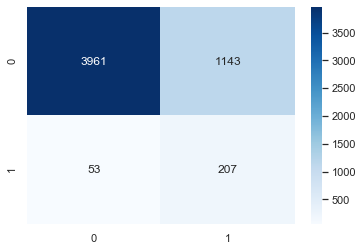

In [312]:
get_metrics(logGrid)

In [313]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=3, scoring = 'roc_auc', verbose = 1)

In [314]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [315]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

AUC: 0.93775
Precision: 0.96522


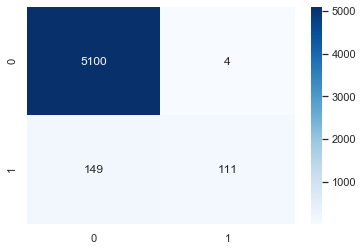

In [316]:
get_metrics(rf_grid)

In [317]:
xgb_grid = GridSearchCV(XGBClassifier(), param_grid=xgb_params, cv=3, scoring = 'roc_auc', verbose = 1)

In [318]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [319]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.2, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

AUC: 0.92726
Precision: 0.98095


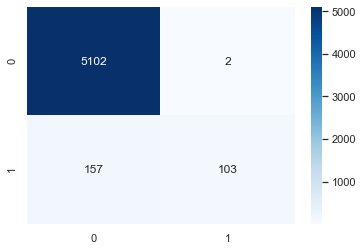

In [320]:
get_metrics(xgb_grid)

# MLP

In [321]:
from tensorflow.keras.layers import Layer, Dense, Input, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [322]:
es = EarlyStopping(
  monitor='accuracy', min_delta=0.0001,
  patience=1)

In [323]:
def get_model(dropout, n_size, input_size, optimizer):
    model = Sequential()
    model.add(Dense(n_size, input_dim=input_size, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(n_size, input_dim=input_size, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

    return model


In [324]:
nn_params = {
    'dropout': [.2, .4],
    'n_size': [64, 128],
    'input_size': [X_train.shape[1]],
    'epochs': [20],
    'optimizer': ['adam']
}


In [325]:
mod = KerasClassifier(build_fn=get_model)
keras_grid = GridSearchCV(estimator=mod, param_grid=nn_params, cv=2, scoring = 'roc_auc')

In [326]:
keras_grid.fit(X_train, y_train, callbacks =[es])

Train on 6258 samples
Epoch 1/20
6258/6258 [==============================] - 1s 95us/sample - loss: 0.2187 - accuracy: 0.9466
Epoch 2/20
6258/6258 [==============================] - 0s 48us/sample - loss: 0.1701 - accuracy: 0.9492
Epoch 3/20
6258/6258 [==============================] - 0s 46us/sample - loss: 0.1517 - accuracy: 0.9508
Epoch 4/20
6258/6258 [==============================] - 0s 45us/sample - loss: 0.1382 - accuracy: 0.9541
Epoch 5/20
6258/6258 [==============================] - 0s 46us/sample - loss: 0.1278 - accuracy: 0.9580
Epoch 6/20
6258/6258 [==============================] - 0s 45us/sample - loss: 0.1207 - accuracy: 0.9621
Epoch 7/20
6258/6258 [==============================] - 0s 46us/sample - loss: 0.1150 - accuracy: 0.9645
Epoch 8/20
6258/6258 [==============================] - 0s 46us/sample - loss: 0.1097 - accuracy: 0.9648
Epoch 9/20
6258/6258 [==============================] - 0s 46us/sample - loss: 0.1027 - accuracy: 0.9680
Epoch 10/20
6258/6258 [==========

GridSearchCV(cv=2, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000029C994D41C8>,
             iid='deprecated', n_jobs=None,
             param_grid={'dropout': [0.2, 0.4], 'epochs': [20],
                         'input_size': [300], 'n_size': [64, 128],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [327]:
keras_grid.best_estimator_.get_params()

{'dropout': 0.4,
 'epochs': 20,
 'input_size': 300,
 'n_size': 128,
 'optimizer': 'adam',
 'build_fn': <function __main__.get_model(dropout, n_size, input_size, optimizer)>}

AUC: 0.89142
Precision: 0.85714


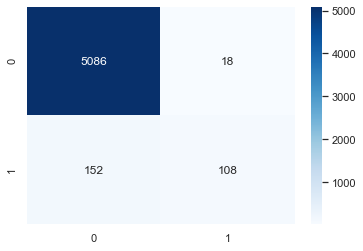

In [328]:
get_metrics(keras_grid)

# Sequence LSTM

In [29]:
from tensorflow.keras.layers import LSTM, GRU, SpatialDropout1D, Embedding, Bidirectional, GlobalMaxPool1D, GlobalAvgPool1D
from tensorflow.keras.layers import concatenate
import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1000, stratify=y)

In [429]:
max_features = 10000 #max number of words to include
max_len = 300 #max length of a sentence
embed_size = 300 #FB FastText embedding size

keras_tokenizer = Tokenizer(num_words=max_features) #max number of words to include from dictionary
keras_tokenizer.fit_on_texts(corpus_list) 

X = keras_tokenizer.texts_to_sequences(data['final_descriptions'])
X = sequence.pad_sequences(X, maxlen=max_len)

#keras_tokenizer.word_index an index of words sorted by most common
word_index = keras_tokenizer.word_index

#embed matrix will be an (X x p) matrix:
    #X: top-X most common words to include 
    #p: embedding size = 300

nb_words = min(max_features, len(word_index))
    
embed_matrix = np.zeros((nb_words, embed_size))

for word, i in word_index.items():
    if i >= nb_words: 
        continue
    try:
        embed_vector = fb_model.get_vector(word)
    except:
        embed_vector = None
    
    if embed_vector is not None:
        embed_matrix[i] = embed_vector


In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1000, stratify=y)
print(X_train.shape, y_train.shape)

(12516, 300) (12516,)


In [436]:
def get_LSTM_GRU_model(dropout, n_size):
    inp = Input(shape=(max_len,)) #length of sentence
    
    x=Embedding(max_features, embed_size, weights=[embed_matrix])(inp)
    x=SpatialDropout1D(dropout)(x)
    x=Bidirectional(LSTM(n_size, return_sequences=True))(x)
    
    avg_pool = GlobalAvgPool1D()(x)
    max_pool = GlobalMaxPool1D()(x)
    
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(1, activation='sigmoid')(conc)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model
    

In [437]:
lstm_mod = get_LSTM_GRU_model(.2, 64)

In [490]:
lstm_mod.fit(X_train, y_train, batch_size=32, epochs = 2, class_weight={0: 1, 1: 5})

  ...
    to  
  ['...']
Train on 12516 samples
Epoch 1/2
12516/12516 [==============================] - 309s 25ms/sample - loss: 0.1057 - accuracy: 0.9865
Epoch 2/2
12516/12516 [==============================] - 311s 25ms/sample - loss: 0.0407 - accuracy: 0.9937


In [491]:
lstm_preds = lstm_mod.predict(X_test, batch_size=1024)

In [496]:
def predict_threshold(preds, threshold):
    
    temp = preds.flatten()
    temp = np.array(temp > threshold, dtype=int)
    
    return temp
    

In [498]:
roc_auc_score(y_test, lstm_preds)

0.9490184922835785

In [493]:
for i in np.linspace(0, 1, 9):
    print(i)
    prec_score = precision_score(y_test, predict_threshold(lstm_preds, i))
    rec_score = recall_score(y_test, predict_threshold(lstm_preds, i))
    total = prec_score + rec_score
    print('Precision:', prec_score)
    print('Recall:', rec_score)
    print('Total:', total)
    print('\n')

0.0
Precision: 0.048471290082028336
Recall: 1.0
Total: 1.0484712900820283


0.125
Precision: 0.4788732394366197
Recall: 0.7846153846153846
Total: 1.2634886240520042


0.25
Precision: 0.5828402366863905
Recall: 0.7576923076923077
Total: 1.3405325443786982


0.375
Precision: 0.6387959866220736
Recall: 0.7346153846153847
Total: 1.3734113712374583


0.5
Precision: 0.7052238805970149
Recall: 0.7269230769230769
Total: 1.4321469575200918


0.625
Precision: 0.7601626016260162
Recall: 0.7192307692307692
Total: 1.4793933708567855


0.75
Precision: 0.8125
Recall: 0.7
Total: 1.5125


0.875
Precision: 0.8979591836734694
Recall: 0.676923076923077
Total: 1.5748822605965462


1.0
Precision: 0.0
Recall: 0.0
Total: 0.0




C:\Users\lzeng\AppData\Local\Continuum\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


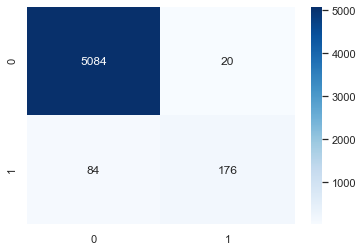

In [495]:
lstm_cm = confusion_matrix(y_test, predict_threshold(lstm_preds, .875))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap = 'Blues')

In [489]:
lstm_mod.save('lstm_mod.h5')